#**Milestones 1 Phase 2**
## **Telco Customer Churn: Artificial Neural Network**
*December 2nd, 2022*

Nadia Oktiarsy, FSDS Batch-016 RMT (*Buddy: Fahmi*)

---
```
Table of Contents:
1. Introduction
   Problem Statements
   Objection
2. Importing Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
   4.1. Central Tendency
   4.2. Features Selection
        4.2.1. Correlation Matrix
        4.2.2. Chi-square
5. Data Preprocessing
   5.1. Data Inference
   5.2. Data Skewness and Outliers
   5.3. Split X and y
   5.4. Train and Test Set
   5.5. Pipelines
6. Model Definition
   6.1. Sequential
   6.2. Functional
7. Model Training
   7.1. Sequential
   7.2. Functional
8. Model Evaluation
   8.1. Sequential
   8.2. Functional
9. Model Saving
10. Model Inference
11. Conclusion
   Business Insights
   Model Insights
```

---
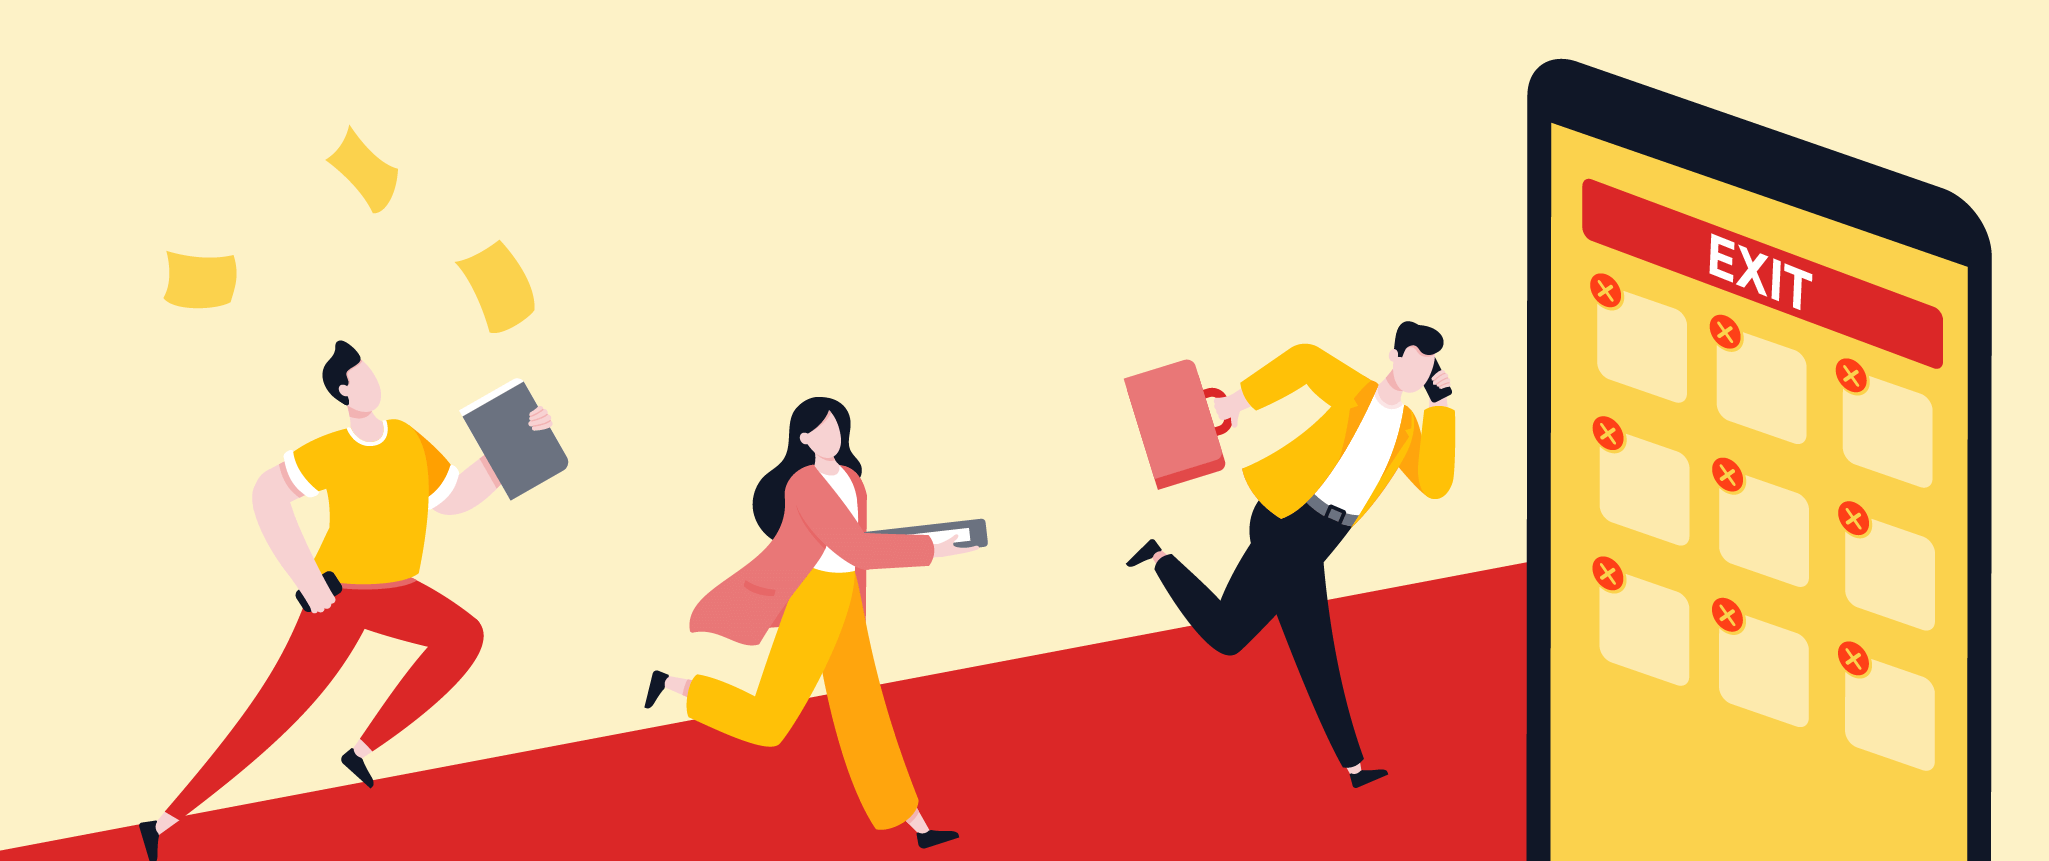

## **1. Introduction**

The development of information, communication, and technology (ICT) is getting a fierce competittion in this decade. The prediction of the potential business based on customers have become crucial especially to make a decision for the business strategy. From here, it is important to predict and analyze further to rate the churn and to retain loyal customers.

This analysis will focus on the churn rate from a telecommunication company, which churn itself is a measure of the number of individuals or items moving out of a collective group over a specific period. This also makes churn as a good indicator of growth potential because of its ability to track lost customers, and growth of the business over time. Churn rates track lost customers, and growth rates track new customers—comparing and analyzing both of these metrics tells you exactly how much your business is growing over time. If growth is higher than churn, the the business is growing.

### **Problem Statements**

Main problem: *Is the business actually growing or not based on its churn rate?*

The churn rate itself will be defined as the target in this prediction, with classification `Yes` or `No`. Since the comprehensive prediction is necessary, the analysis will be using Artifical Neural Network (ANN) with two models: **Sequential** and **Functional**.

## **2. Importing Libraries**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import sys
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

# Imbalance Data Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE 

# Preprocessing Libraries
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature Selection
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# Import Evaluation Libraries for Classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Import Tensorflow
import tensorflow as tf

# Create Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# Create Functional Model
from tensorflow.keras.layers import Input, concatenate, Dropout, BatchNormalization
from tensorflow.keras import Model

# Save and Load Model
import joblib
import json

## **3. Data Loading**

Dataset is based on an open source data repository, Kaggle.

Link: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Information included in the dataset:

1. **Demographic information** – gender, age range, and if they have partners and dependents.
2. **Customer account information** – how long customers have been using the service, contract, payment method, paperless billing, monthly charges, and total charges
3. **Service Information** – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

In [2]:
url = 'https://raw.githubusercontent.com/nadiaoktiarsy/hacktiv8_p0/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**(1) Demographic Information**

Header | Definition
---|---
`gender` | Whether the customer is a female or a male (Female, Male)
`SeniorCitizen` | Whether the customer is a senior citizen or not (1, 0)
`Partner` | Whether the customer has a partner or not (Yes, No)
`Dependents` | Whether the customer has dependents or not (Yes, No)

**(2) Customer Account Information**

Header | Definition
---|---
`tenure` | Number of months the customer has stayed with the company(Multiple different numeric values)
`Contract` | Indicates the customer’s current contract type (Month-to-Month, One year, Two year)
`PaperlessBilling` | Whether the customer has paperless billing or not (Yes, No)
`PaymentMethod` | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit - Card (automatic))
`MontlyCharges` | The amount charged to the customer monthly (Multiple different numeric values)
`TotalCharges` | The total amount charged to the customer (Multiple different numeric values)


**(3) Service Information**

Header | Definition
---|---
`PhoneService` | Whether the customer has a phone service or not (Yes, No)
`MultipleLines` | Whether the customer has multiple lines or not (No phone service, No, Yes)
`InternetServices` | Whether the customer is subscribed to Internet service with the company (DSL, Fiber optic, No)
`OnlineSecurity` | Whether the customer has online security or not (No internet service, No, Yes)
`OnlineBackup` | Whether the customer has online backup or not (No internet service, No, Yes)
`DeviceProtection` | Whether the customer has device protection or not (No internet service, No, Yes)
`TechSupport` | Whether the customer has tech support or not (No internet service, No, Yes)
`StreamingTV` | Whether the customer has streaming TV or not (No internet service, No, Yes)
`StreamingMovies` | Whether the customer has streaming movies or not (No internet service, No, Yes)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Converting all columsn to the correct dtypes
df = df.astype({'tenure':'float', 'SeniorCitizen': 'object'})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Apparently there are 11 missing values. It is important to consider if missing value should be replaced with other values (such as mean, median, or modes) or dropped them. However, since the total data is 7043 rows, dropping missing values, is `0.0015%` of the data will not change too much for this dataset. Thus, we can drop these missing values from `TotalCharges`.

In [7]:
# Dropping one missing value from CREDIT_LIMIT
df.dropna(subset = ['TotalCharges'], inplace = True)

## **4. Exploratory Data Analysis (EDA)**

### **4.1. Central Tendency**

Based on the numerical central tendency analysis, there are only three features with numerical values, which are from Customer Account Information. 

In [8]:
# General statistic information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


**Detecting Imbalance Data**

If there are two classes, balanced data means 50 percentage points for each class. It is significant to check whether the target in ANN is already balanced or not. Based on the pie chart below, it can be seen that Churn, as the target, is imbalanced.

In [9]:
# Number of Senior Citizen
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

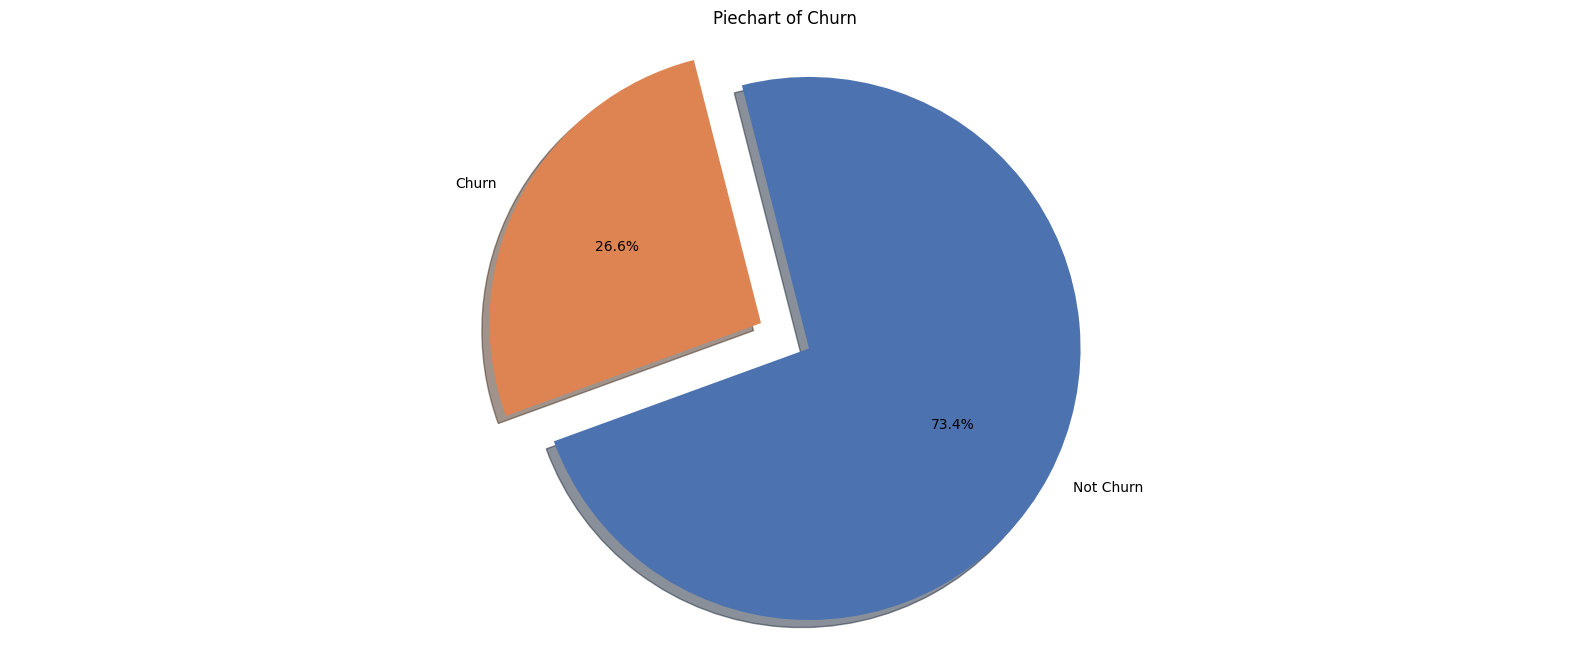

In [10]:
def isolate():
  # Creating Plot piechart of Sex
  churn = dict(df.Churn.value_counts())
  labels = 'Not Churn', 'Churn'
  sizes = [churn["No"], churn["Yes"]]
  explode = (0, 0.2)

  with sns.color_palette("deep"):
      plt.pie(sizes, explode=explode, labels=labels,
     autopct='%1.1f%%', shadow=True, startangle=200)

  # Plot title
  plt.axis('equal')
  plt.title('Piechart of Churn')
  plt.show()
isolate()

**Other customers characteristics**

This other characteristics of customees shows that most of customers are not senior citizens and also not depedents. That means cuztomers are mostly adults who can pay their bills for telecommunication. However, we should check whether they tend to be churn or not, by comparing these histogram with the target "Churn".

Number of Senior Citizens:  0    5890
1    1142
Name: SeniorCitizen, dtype: int64


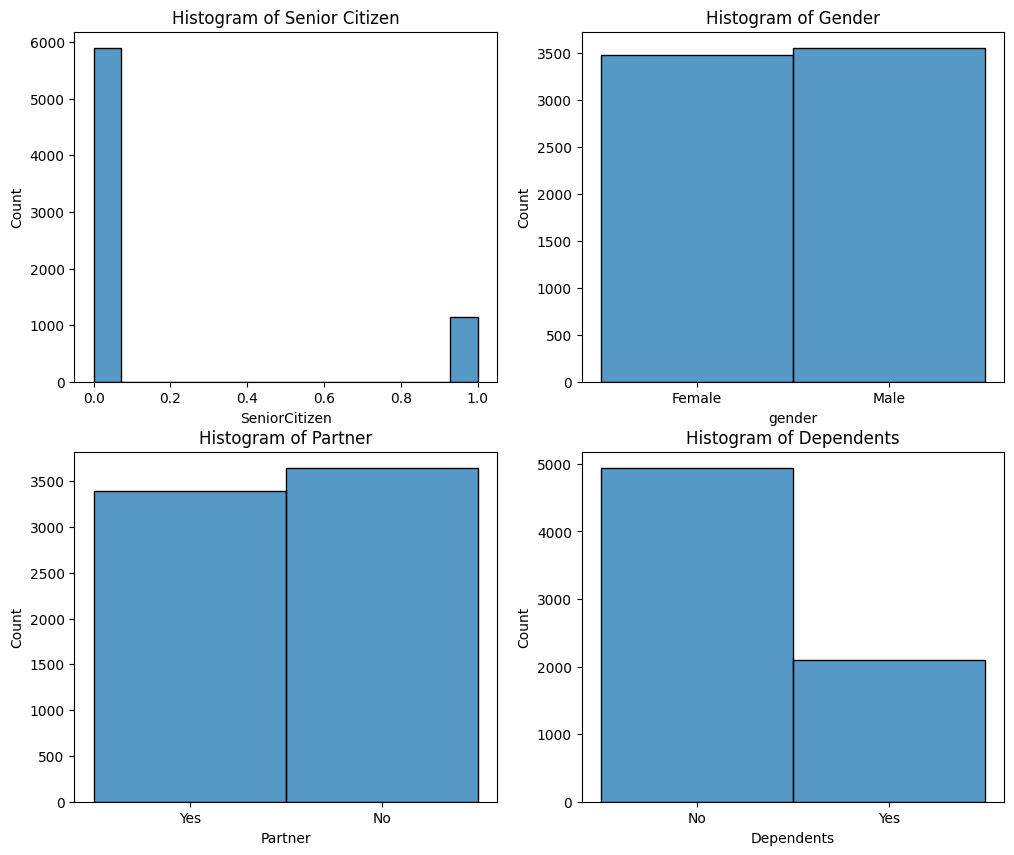

In [11]:
# Bar plot Balance and Purchases
matplotlib.rcParams['figure.figsize'] = (12,10)
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="SeniorCitizen")
plt.title('Histogram of Senior Citizen')

# Scatter plot Balance and One-Off Purchases
plt.subplot(2, 2, 2)
sns.histplot(data=df, x="gender")
plt.title('Histogram of Gender')

# Scatter plot Balance and Installments Purchases
plt.subplot(2, 2, 3)
sns.histplot(data=df, x="Partner")
plt.title('Histogram of Partner')

# Scatter plot Balance and Installments Purchases
plt.subplot(2, 2, 4)
sns.histplot(data=df, x="Dependents")
plt.title('Histogram of Dependents')

# Number of Senior Citizen
print('Number of Senior Citizens: ', df.SeniorCitizen.value_counts())

**Churn comparison with other features**

Based on histogram below, we can summarize:
- **Non-senior citizens** are the dominant customers, that means the telecommunication business should be at least targeting non-seninor citizens. Meanwhile, senior citizens tend to be churn because they probably do not need telecommunication services compared with non-senior citizens.
- Gender and partnera are balanced. These variables perhaps do not have any relationship with `Churn`.
- The histogram belom shows that the most influential overall toward the increase number of Churn are `tenure` and `TotalCharges`.
- From all these services provided by the company (such as `OnlineSecurities`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`), apparently those variables have the same pattern. This means the telecommunication company provides these services as a bundle of service, or it can be called as **a subscription plan**.
- Subcription plans are apparently followed by `tenure` and `TotalCharges`. Phone service and Internet service will be two main services.
- Payment method shows that `Electronic Check` has the highest Churn overall. This refers that the telecommunication service provides this payment method, however this creates `Churn` happen even more because of its simplicity to subscribe and unsubscribe the telecommunication service.

Churn patterns for Services are mostly the same.

CPU times: total: 2min 36s
Wall time: 2min 40s


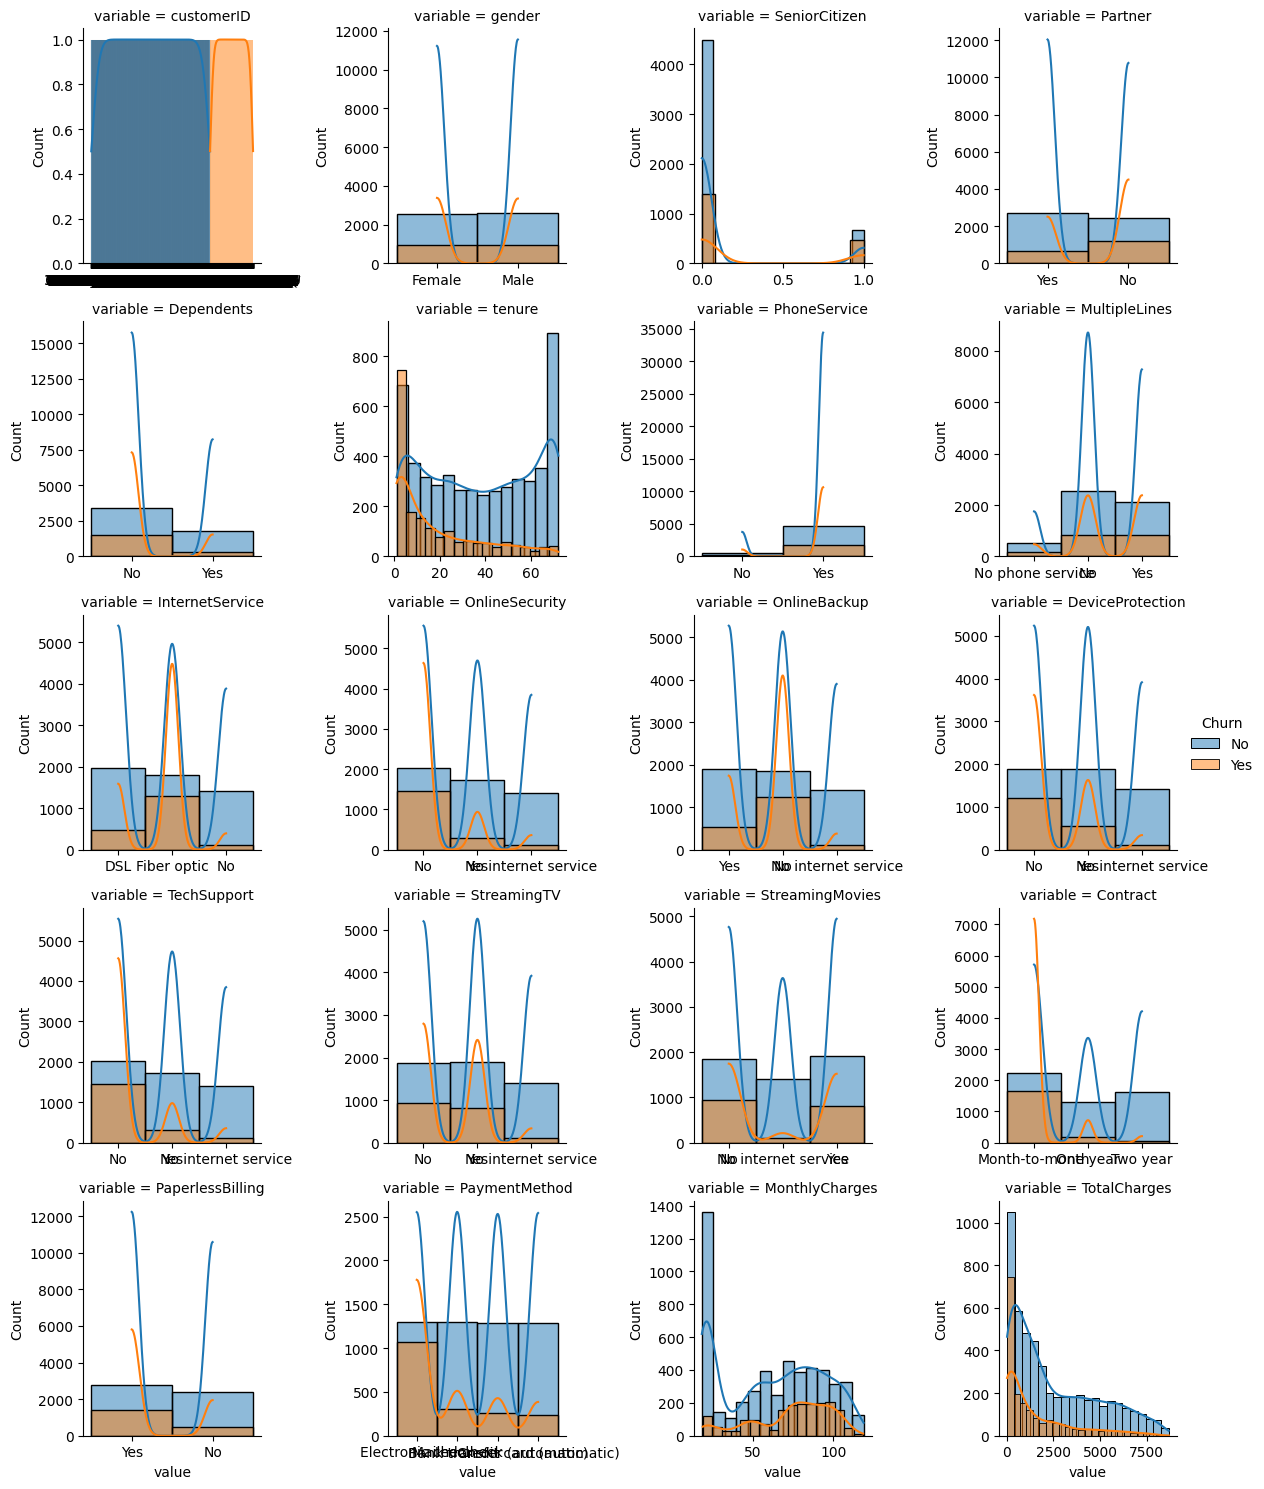

In [12]:
%%time
def isolate():
  # Creating new dataframe for the histogram
  output = 'Churn'
  cols = [f for f in df.columns if df.dtypes[f] != "int"]
  f = pd.melt(df, id_vars=output, value_vars=cols)

  # Creating histogram
  matplotlib.rcParams['figure.figsize'] = (20,20)
  g = sns.FacetGrid(f, hue=output, col="variable", col_wrap=4, sharex=False, sharey=False )
  g = g.map(sns.histplot, "value", kde=True).add_legend()
isolate()

### **4.2. Features Selection**

CustomerID should be omitted here since it is basically just the name of the customers.

In [13]:
# Drop target from features table, and from selection analysis
df = df.drop(['customerID'], axis=1)

#### **4.2.1. Correlation Matrix**

In this correlation matrix, we will see if `Churn` actually has correlation between variables like in central tendency. We should compare this correlation matrix with central tendency later.

In [14]:
# Splitting between numerical columns and categorical columns
num_columns = ['tenure','MonthlyCharges','TotalCharges']
cat_columns = df.select_dtypes(include=['object','category']).columns.tolist()

print('Numerical columns  : ', num_columns)
print('Categorical columns  : ', cat_columns)

Numerical columns  :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns  :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


**Categorical Features**

The correlation between target `Churn` and other variables does not seem to show any high correlation. The correlation is either weak and no correlation. However, the correlation matrix below shows if there is a negative correlation between `Churn` and internet services. This can refer that **the more customers use the internet, the lower chances customers to be unsubscribe or leave the service plan**.

In [15]:
# Creating dataframe for categorical columns
df_categorical = df[cat_columns]

<AxesSubplot: >

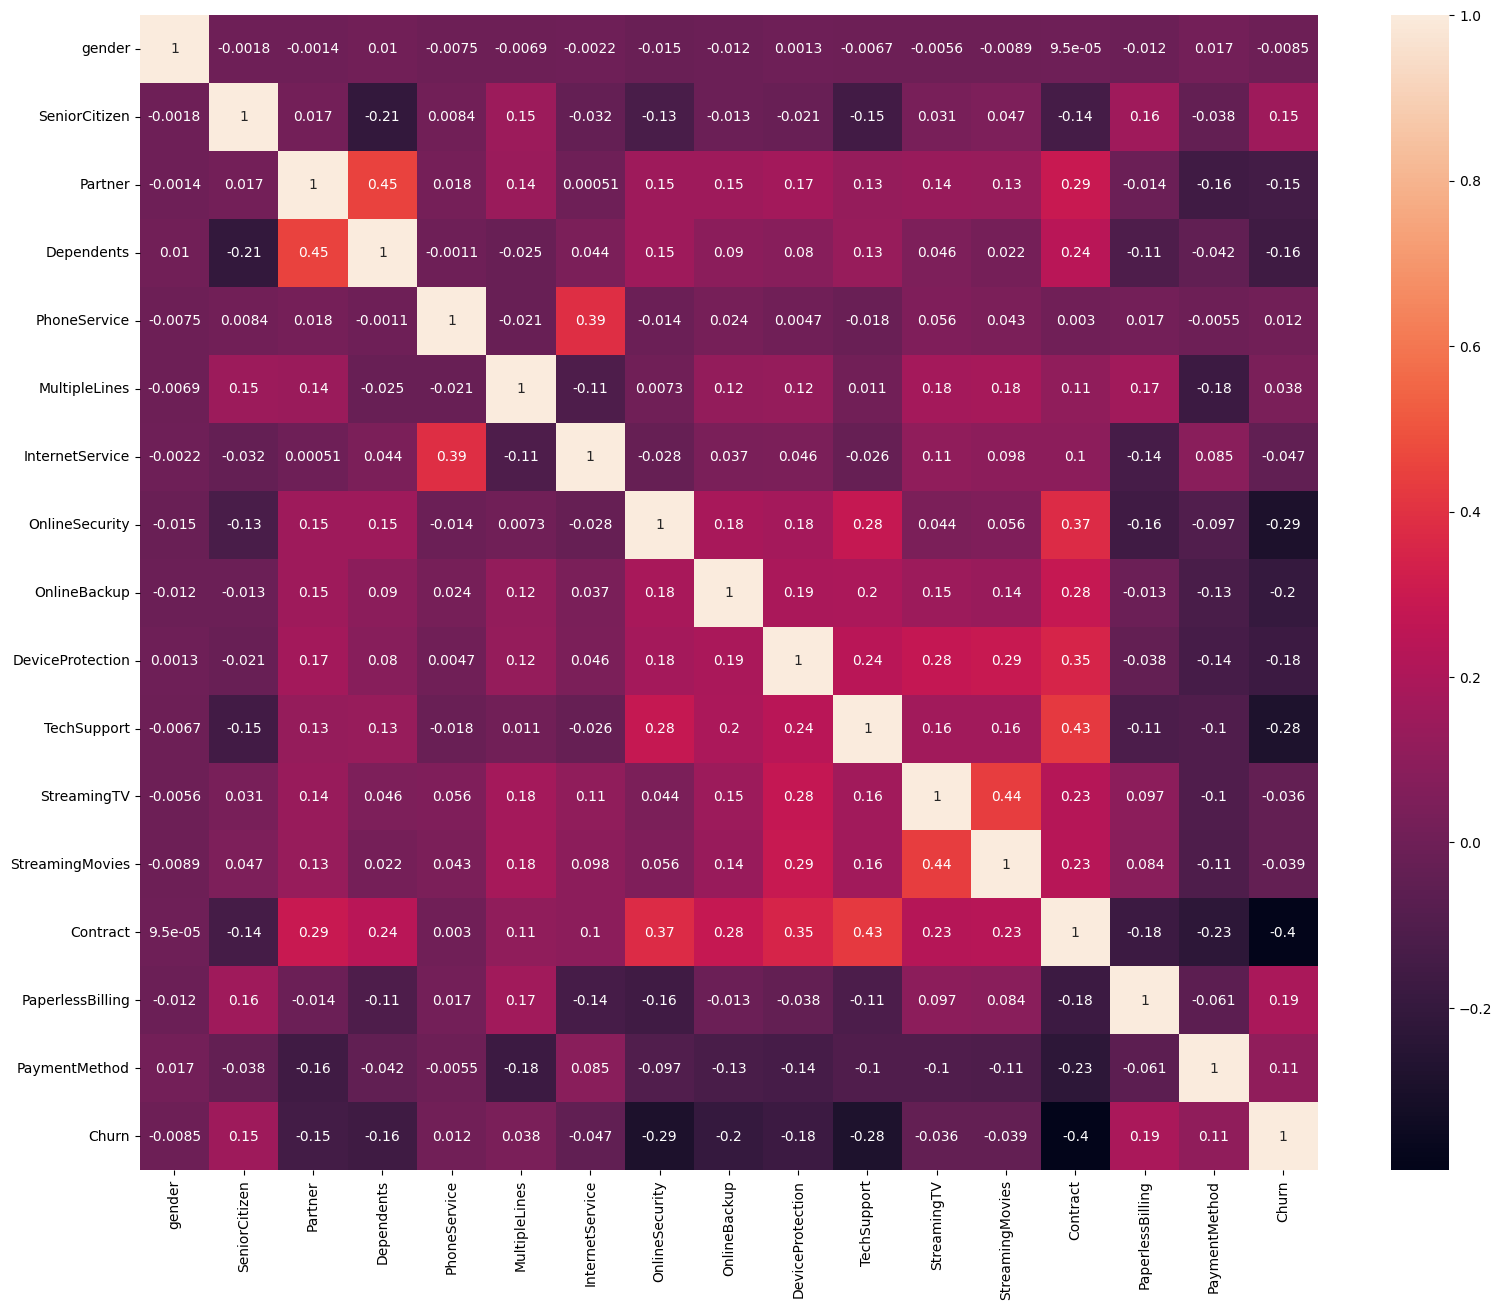

In [16]:
# Using LabelEncoder to make categorical to be numerical data
le = LabelEncoder()
  
# Encode categorical features
df_categorical_encode = df_categorical.copy()
for col in df_categorical_encode.select_dtypes(include='O').columns:
  df_categorical_encode[col]=le.fit_transform(df_categorical_encode[col])
  
# Plotting Correlation Matrix of Categorical columns and Price
plt.figure(figsize=(19,15))
sns.heatmap(df_categorical_encode.corr(),annot=True)

**Numerical Features**

For numerical features, it shows either weak and no correlation. However, the average from these features is higher than categorical features. Apparently the analysis from central tendency shows the same correlation, where `tenure` and `TotalCharges` are the most correlated with the `Internet subscription plans` that all of them have **negative correlations**. Customers tend to unsubscribe when the charges is not as high, because customers maybe do not need the internet service at the moment or other unknown reasons.

<AxesSubplot: >

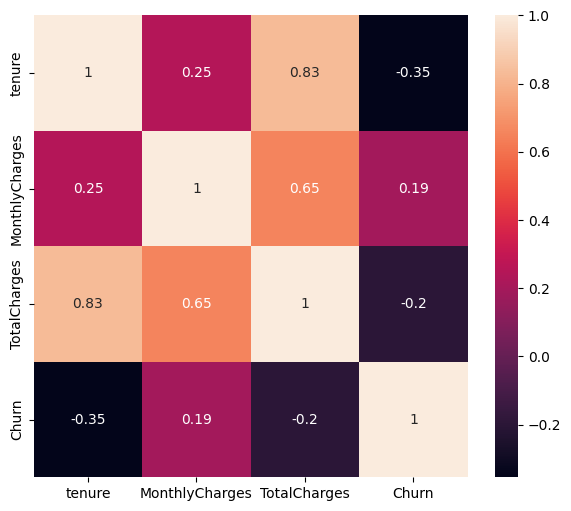

In [17]:
# Using OrdinalEncoder to rank target variable
enc = OrdinalEncoder()

churn_corr = df.copy()
enc.fit(churn_corr[['Churn']])
churn_corr[['Churn']] = enc.transform(churn_corr[['Churn']])
churn_corr = churn_corr['Churn']

# Creating new dataframe for temperature with price
df_num = df[num_columns]

# Concatenate data numerical and the labeled target (income_bracket)
df_num = pd.concat([df_num, churn_corr], axis=1).sort_index()

# Plotting Correlation Matrix of Temperature and Price
plt.figure(figsize=(7,6))
sns.heatmap(df_num.corr(),annot=True)

#### **4.2.2. Chi-square**

There are many features under the threshold 5% (*p-value* = 0.05). Variables that will be kept are mainly numerical variables based on its extreme significance, meanwhile categorical will be chosen based on correlation and its significance, and features selection based on intuition.

In [18]:
def isolate():
  X_chi = df_num.drop(['Churn'],axis=1)
  y_chi = pd.DataFrame(df_num['Churn'])
  
  # k = 4 tells four top features to be selected
  # Score function Chi2 tells the feature to be selected using Chi Square
  train = SelectKBest(score_func=chi2, k=3)
  fit = train.fit(X_chi, y_chi)
  
  chi = pd.Series(fit.scores_)
  chi.index = X_chi.columns
  chi.sort_values(ascending=False)
  print(chi)
isolate()

tenure             16377.328093
MonthlyCharges      3653.074681
TotalCharges      629630.810349
dtype: float64


In [19]:
def isolate():
  X_chi = df_categorical_encode.drop(['Churn'],axis=1)
  y_chi = pd.DataFrame(df_categorical_encode['Churn'])
  
  # k = 5 tells four top features to be selected
  # Score function Chi2 tells the feature to be selected using Chi Square
  train = SelectKBest(score_func=chi2, k=5)
  fit = train.fit(X_chi, y_chi)
  
  chi = pd.Series(fit.scores_)
  chi.index = X_chi.columns
  chi.sort_values(ascending=False)
  print(chi)
isolate()

gender                 0.254297
SeniorCitizen        133.482766
Partner               81.857769
Dependents           131.271509
PhoneService           0.092948
MultipleLines          9.735960
InternetService        9.715269
OnlineSecurity       550.437364
OnlineBackup         229.441123
DeviceProtection     190.688004
TechSupport          522.164716
StreamingTV            7.373234
StreamingMovies        8.357624
Contract            1111.759054
PaperlessBilling     104.979224
PaymentMethod         59.240507
dtype: float64


## **5. Data Preprocessing**

In data preprocessing, there are some steps that will be taken:
1. Droppping `customerID`, `gender`,`MultipleLines`,`Partner`, and `Dependents` because the values are not correlateed based on the correlation and significance.
2. Creating data inference.
3. Seperating train, test and validation set.
4. Oversampling imbalanced data.
5. Creating pipelines. First set of pipeline will be using scikit-learn, second set of pipeline will be used for tensorflow.

In [20]:
# Drop target from features table, and from selection analysis
df = df.drop(['gender','MultipleLines','Partner','Dependents'],axis=1)
df.head()

,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,34.0,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,2.0,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,45.0,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,2.0,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **5.1. Data Inference**

In [21]:
# Creating data inference
df_inf = df.sample(10, random_state=4).sort_index()

# Drop data inference as a new dataframe
df_train_test = df.drop(df_inf.index)

In [22]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,No
1,0,18.0,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),25.55,467.85,No
2,0,1.0,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
3,0,71.0,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.90,Yes
4,0,16.0,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,53.90,834.15,Yes
5,0,31.0,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.05,1882.80,No
6,0,14.0,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.75,712.75,Yes
7,0,72.0,No,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),38.50,2763.00,No
8,1,69.0,No,DSL,Yes,Yes,No,No,Yes,Yes,Two year,No,Credit card (automatic),56.55,3952.65,No
9,0,53.0,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,110.50,5835.50,No


### **5.2. Data Skewness and Outliers**

The skewness from most of features are mostly Normal Distribution, and the missing values before is already dropped. However, we should recheck the outliers since the number of data is relatively big. Based on these skewness results, apparently there is no extreme skewness.

In [23]:
# Check Missing Values on X_train

print('Missing value DataFrame after taking data inference: ', df_train_test.isnull().sum().sum())

Missing value DataFrame after taking data inference:  0


In [24]:
df_train_test.skew()

SeniorCitizen     1.830218
tenure            0.237606
MonthlyCharges   -0.222748
TotalCharges      0.961619
dtype: float64

The boxplots of outliers below also do not show any significant extreme values. From both data skewness and boxplots show that this process can be skipped and to proceed the next part of data preprocessing such as handling imbalanced data and splitting train, test, and val set.

Text(0, 0.5, 'MonthlyCharges')

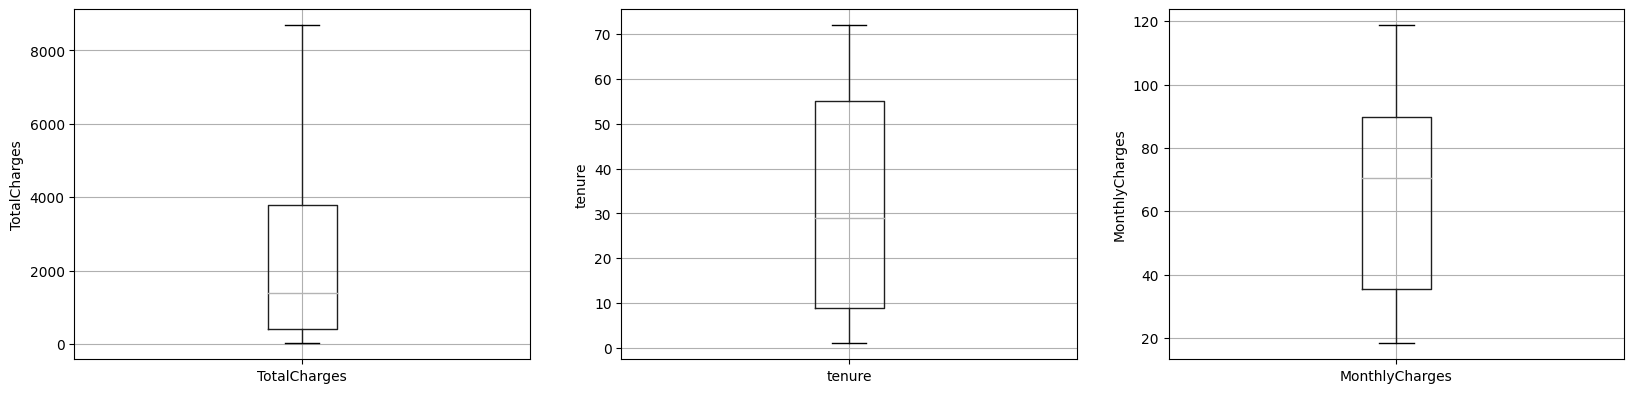

In [25]:
# Draw boxplots to visualize outliers

plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
fig2 = df_train_test.boxplot(column='TotalCharges')
fig2.set_title('')
fig2.set_ylabel('TotalCharges')

plt.subplot(2, 3, 2)
fig3 = df_train_test.boxplot(column='tenure')
fig3.set_title('')
fig3.set_ylabel('tenure')

plt.subplot(2, 3, 3)
fig3 = df_train_test.boxplot(column='MonthlyCharges')
fig3.set_title('')
fig3.set_ylabel('MonthlyCharges')

### **5.3. Split X and y**

Defining X as features where `Churn` is dropped, and y will be using `Churn` instead.

In [26]:
# Defining X and y
X = df_train_test.drop(['Churn'],axis=1)
y = pd.DataFrame(df_train_test['Churn'])

### **5.4. Train and Test Set**

The splitting will be done twice, where the first split is where the proportion is `0.85` as **train validation set** and `0.15` **test set**.

The second splitting is based on **the train validation set** and to split into two: **train set** and **validation set**, which will be taking the same proportion, where train set is `0.85` and validation set is `0.15.`

In [27]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                            test_size=0.15,
                                                            random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.15,
                                                  random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5072, 15)
Val Size :  (896, 15)
Test Size :  (1054, 15)


**Imbalance Data Handling**

As already mentioned from EDA, there is an imbalance data between for the target `Churn`. The problem with training the model with an imbalanced dataset is that **the model will be biased towards the majority class only**. This causes a problem when we are interested in the prediction of the minority class.

The imbalance data handling will be done **after splitting the train set and validation set to prevent the data leakage**. Thus, the pipelines will be also done by using train set and validation set will test the train set in the pipelines and model later.

In [28]:
print('Number of target before imbalance data handling: ', len(y_train))

Number of target before imbalance data handling:  5072


In [29]:
# Encode target
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)
y_val = enc.transform(y_val)

# Define Oversampling
ros = RandomOverSampler(random_state=42)

# Fit an resample
X_train, y_train = ros.fit_resample(X_train, y_train)

In [30]:
print('New number of features after oversampling: ', len(X_train))
print('New number of target after oversampling: ', len(y_train))

New number of features after oversampling:  7456
New number of target after oversampling:  7456


### **5.5. Pipelines**

The pipelines creating will be done twice. First step is to make pipeline for scaling and encoding variables. The scaling will be using StandardScaler as we can see the average of the data show there are more normal distribution rather than skewed data.

After creating pipelines for scaling and encoding, another pipeline will be applied which is actually different from the scaling/encoding pipeline. It will be called as **pipeline tensorflow**, as we need to bundle the scaled and encoded pipelines so it can be proceeded in the model.

In [31]:
# Splitting between numerical columns and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns  : ', num_columns)
print('Categorical columns  : ', cat_columns)

Numerical columns  :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns  :  ['SeniorCitizen', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


**Pipeline Scikit-learn**

In [32]:
# Create A Pipeline

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [33]:
final_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('pipe_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['SeniorCitizen', 'PhoneService',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [34]:
# Fit and Transform
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_val.shape

(896, 37)

After the transfor, we should take notes that there are 37 features createed where OneHotEncoder encodes the categorical features into 34 features, and StandardScaler scales the numerical features into 3 features..

**Pipeline Tensorflow**

In pipeline tensorflow, there are three improvements that will be applied:
- Batch will be taking **100**,
- Repeat the pipelines for **5 times**,
- Number of dataset shuffled will be **100**.

These numbers are randomly picked as trial-and-error should be applied and still no hyperparameter tuning yet.

In [35]:
# Bundle preprocessing for numerical and categorical data to tensorflow before being input to the model
train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(100).repeat(5).shuffle(100)

test_pipe = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(100).repeat(5).shuffle(100)

val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(100).repeat(5).shuffle(100)

## **6. Model Definition**

Models that will be used are Neural Networks with sequential and functional model. Inspired by how human brains work, these computational systems learn a relationship between complex and often non-linear inputs and outputs.

In Neural Networks, it is important to define which one is input layer, hidden layers, and output layer. Moreover, Neural Networks with many layers are referred to as **deep learning systems**.

### **6.1. Sequential**

In sequential neural networks, we create the model layer-by-layer. Sharing of layers or branching of layers and multiple inputs or outputs are not allowed. So in this model, we can see from the flow chart that sequential model is basically a series model.

In [36]:
# Create Sequential API
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(37, activation='relu',input_shape=(37,),kernel_initializer='glorot_normal',kernel_regularizer='l1')) #input layer
model_seq.add(tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dropout(rate=0.5))

model_seq.add(tf.keras.layers.Dense(8, activation='relu')) #hidden layer 1

model_seq.add(tf.keras.layers.Dense(10, activation='relu')) #hidden layer 2

model_seq.add(tf.keras.layers.Dense(20, activation='relu')) #hidden layer 3

model_seq.add(tf.keras.layers.Dense(160, activation='relu')) #hidden layer 4

model_seq.add(tf.keras.layers.Dense(80, activation='relu')) #hidden layer 5

model_seq.add(tf.keras.layers.Dense(20, activation='relu')) #hidden layer 6

model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq.compile(loss='binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(clipvalue=1.0),
                  metrics='accuracy')

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                1406      
                                                                 
 batch_normalization (BatchN  (None, 37)               148       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 37)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 304       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                        

In [37]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### **6.2. Functional**

Functional neural network is different from sequential. The model is completely different because it enables sharing or branching layers. The model can be seen by the flow chart, that functional neural network is done paralelly.

In [38]:
# Create Functional API

# Input Layer
input_layer = Input(shape=(37,))
bactch1 = BatchNormalization()(input_layer)
dropout1 = Dropout(0.1)(bactch1)

# Hidden Layer
hidden1_layer = Dense(100, activation='relu', kernel_regularizer='l1', kernel_initializer='glorot_normal')(dropout1)
bactch2 = BatchNormalization()(hidden1_layer)
dropout2 = Dropout(0.5)(bactch2)

hidden2_layer = Dense(32, activation='relu')(dropout1)

hidden3_layer = Dense(16, activation='relu')(hidden2_layer)

hidden4_layer = Dense(8, activation='relu')(hidden3_layer)

concat_layer = concatenate([input_layer, hidden4_layer])

# Output layer
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_func = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_func.summary()

model_func.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 37)          148         ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_1 (Dropout)            (None, 37)           0           ['batch_normalization_1[0][0]']  
                                                                                                  
 dense_9 (Dense)                (None, 32)           1216        ['dropout_1[0][0]']          

In [39]:
# Plot Layers
tf.keras.utils.plot_model(model_func, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## **7. Model Training**

After defining the model, picking their parameters to improve the model and number of layers, then the model training should be done, where the batch size for sequential model is 500 and higher than functional so the process of training will be faster.

### **7.1. Sequential**

In [40]:
# Train the Model Sequential

%time 
history_seq = model_seq.fit(train_pipe,
                            epochs=20,
                            batch_size=500,
                            validation_data = val_pipe)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/20
375/375 [==============================] - 10s 9ms/step - loss: 1.2281 - accuracy: 0.6197 - val_loss: 0.7473 - val_accuracy: 0.6228
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6029 - accuracy: 0.7445 - val_loss: 0.5322 - val_accuracy: 0.7344
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4568 - accuracy: 0.8181 - val_loss: 0.4699 - val_accuracy: 0.8136
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.4081 - accuracy: 0.8365 - val_loss: 0.4645 - val_accuracy: 0.8158
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3907 - accuracy: 0.8398 - val_loss: 0.4546 - val_accuracy: 0.8136
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3911 - accuracy: 0.8362 - val_loss: 0.4692 - val_accuracy: 0.7980
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3652 - accuracy: 0.8428 - val_lo

### **7.2. Functional**

In [41]:
# Train the Model Functional

%time 
history_func = model_func.fit(X_train, 
                              y_train, 
                              epochs=10, 
                              validation_data=(X_val, y_val), 
                              batch_size=500)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/10
15/15 [==============================] - 3s 35ms/step - loss: 0.6211 - accuracy: 0.6584 - val_loss: 0.6151 - val_accuracy: 0.6574
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5769 - accuracy: 0.7108 - val_loss: 0.5750 - val_accuracy: 0.6975
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5484 - accuracy: 0.7354 - val_loss: 0.5411 - val_accuracy: 0.7266
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5296 - accuracy: 0.7420 - val_loss: 0.5308 - val_accuracy: 0.7433
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5123 - accuracy: 0.7461 - val_loss: 0.5143 - val_accuracy: 0.7500
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.5002 - accuracy: 0.7552 - val_loss: 0.5067 - val_accuracy: 0.7522
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.4922 - accuracy: 0.7572 - val_loss: 0.5015 - v

## **8. Model Evaluation**

As a reminder that the model improvement and pipelines for tensorflow parameters are still randomly picked, then there is a big chance that the results will not be as optimized. However, we can see that apparently from the model defined before, **functional neural network** has a better result so far.

There are three evaluations that will be observed:
- Accuracy
- Loss
- F1-score

**Accuracy** is the percentage of precision that the predicition predicts the actual observation right.

Unlike accuracy, **loss** is not a percentage but a summary of errors made for each sample in training or validation sets. In this case, Loss is often used in the training process to find the "best" parameter values for the model (e.g. weights in neural network). During the training process the goal is to minimize this value.

### **8.1. Sequential**

The summary of sequential neural network model, we can see that from 20 epochs and 500 batch size can create a better accuray for both train and validation set, where the final results are above 80% accuracy. The loss is also getting lower as its epoch tries the set for 20 times, with the lowest error is actually at epoch 17.

However, the final backpropagation does not show the best result, meanwhile the best result can be seen at epoch number 7.

In [42]:
# Create DataFrame
df_history_seq = pd.DataFrame(history_seq.history)
df_history_seq

,loss,accuracy,val_loss,val_accuracy
0,1.228135,0.619689,0.747336,0.622768
1,0.602946,0.744501,0.532225,0.734375
2,0.456839,0.818079,0.469924,0.813616
3,0.408098,0.836454,0.464476,0.815848
4,0.390702,0.839780,0.454569,0.813616
5,0.391098,0.836212,0.469206,0.797991
6,0.365202,0.842838,0.465060,0.812500
7,0.371470,0.842516,0.434440,0.824777
8,0.369002,0.842221,0.547264,0.786830
9,0.366621,0.843455,0.518853,0.803571


**Accuracy and Loss**

Based on the train and validation accuarcy and loss, we can see that the results are positive and the train and validation dataset are working to be tested in the model. There is also no exploding and vanishing result so far, which means the parameters for `gradient clipping`, `weight regularizer`, `weight initialier`, `dropout` and `batch regularizer` work to the model.

<AxesSubplot: >

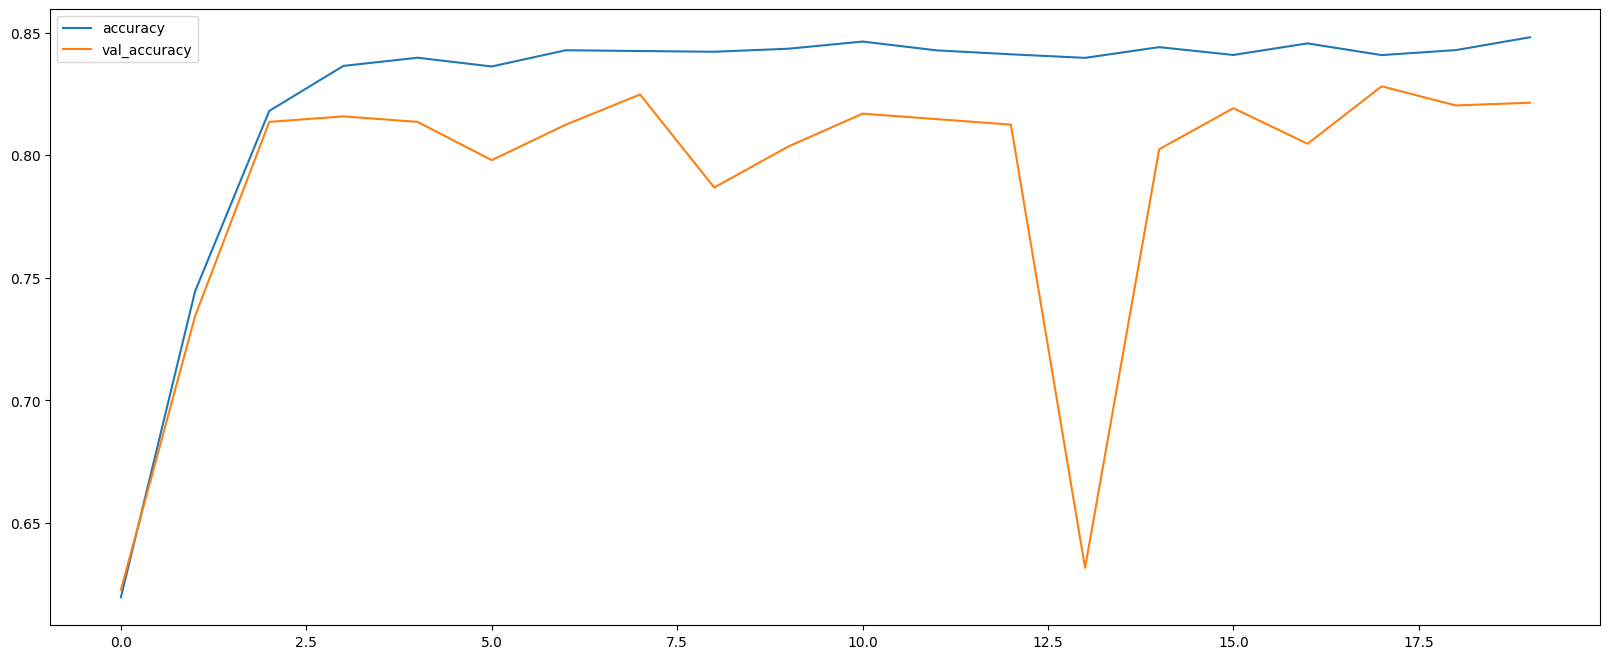

In [43]:
# Plot between accuracy and val_accuracy
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

df_history_seq[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

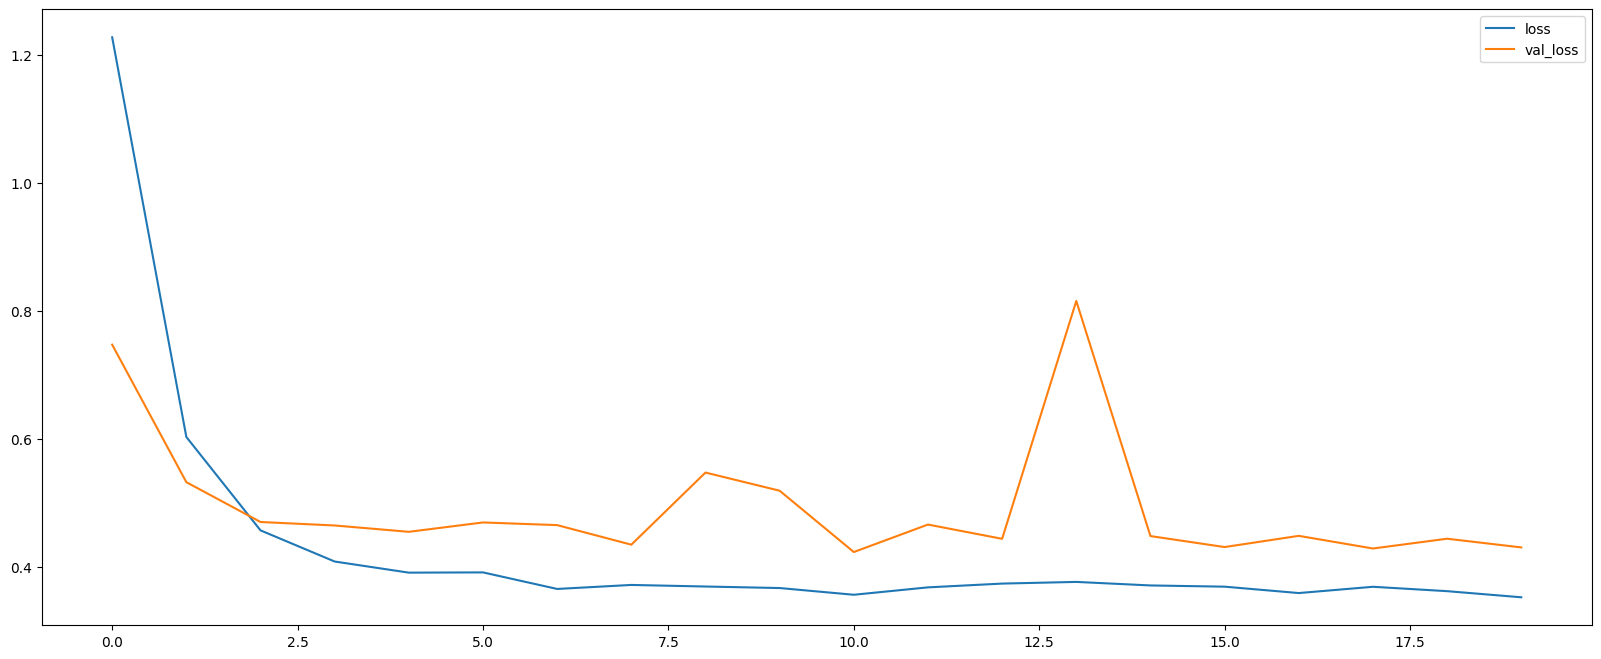

In [44]:
# Plot between loss and val_loss
df_history_seq[['loss', 'val_loss']].plot()

**F1-Score** 

However, for the classification report, we can see that f1-score is not good enough, which means the prediction is still 50-50 right and wrong and it will create many misprediction to class either the customers are predicted as `Churn` or not. The recall for class-1 is also very low, which is underfitting, and it means that the prediction mispredicts that more customers will be included as churn while the actual observation shows the opposite.


In [45]:
# Classification Report
y_pred_train_seq = model_seq.predict(X_train)
y_pred_test_seq = model_seq.predict(X_test)
y_pred_val_seq = model_seq.predict(X_val)

y_pred_train_seq = np.where(y_pred_train_seq >=0.5, 1, 0)
y_pred_test_seq = np.where(y_pred_test_seq >=0.5, 1, 0)
y_pred_val_seq = np.where(y_pred_val_seq >=0.5, 1, 0)
print('\n')

print('Train set Classification Report')
print(classification_report(y_train, y_pred_train_seq))

# Model Evaluation
print('F1-Score')
print('Train Set  : ', f1_score(y_train, y_pred_train_seq))
print('Test Set  : ', f1_score(y_test, y_pred_test_seq))
print('Validation Set  : ', f1_score(y_val, y_pred_val_seq))

28/28 [==============================] - 0s 3ms/step


Train set Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75      3728
         1.0       0.86      0.46      0.60      3728

    accuracy                           0.69      7456
   macro avg       0.74      0.69      0.67      7456
weighted avg       0.74      0.69      0.67      7456

F1-Score
Train Set  :  0.596889743141709
Test Set  :  0.5657370517928286
Validation Set  :  0.5628415300546449


### **8.2. Functional**

The functional model has no better than sequential model as in accuracy and loss results. The highest result is the final backpropagation #20 with:

In [46]:
# Create DataFrame
df_history_func = pd.DataFrame(history_func.history)
df_history_func

,loss,accuracy,val_loss,val_accuracy
0,0.621066,0.658396,0.615131,0.657366
1,0.576918,0.710837,0.574970,0.697545
2,0.548383,0.735381,0.541111,0.726562
3,0.529582,0.741953,0.530799,0.743304
4,0.512302,0.746110,0.514322,0.750000
5,0.500198,0.755231,0.506689,0.752232
6,0.492242,0.757243,0.501492,0.755580
7,0.489605,0.756840,0.499301,0.747768
8,0.485408,0.760864,0.500225,0.750000
9,0.483259,0.762205,0.499314,0.746652


**Accuracy and Loss**

The data train and validation set are working for the functional mode, however, it should be noted that the optimization can be applied to increase the accuracy, and lower the errors even more. From here, we can see much potential that functional model works even better and faster than sequential.

<AxesSubplot: >

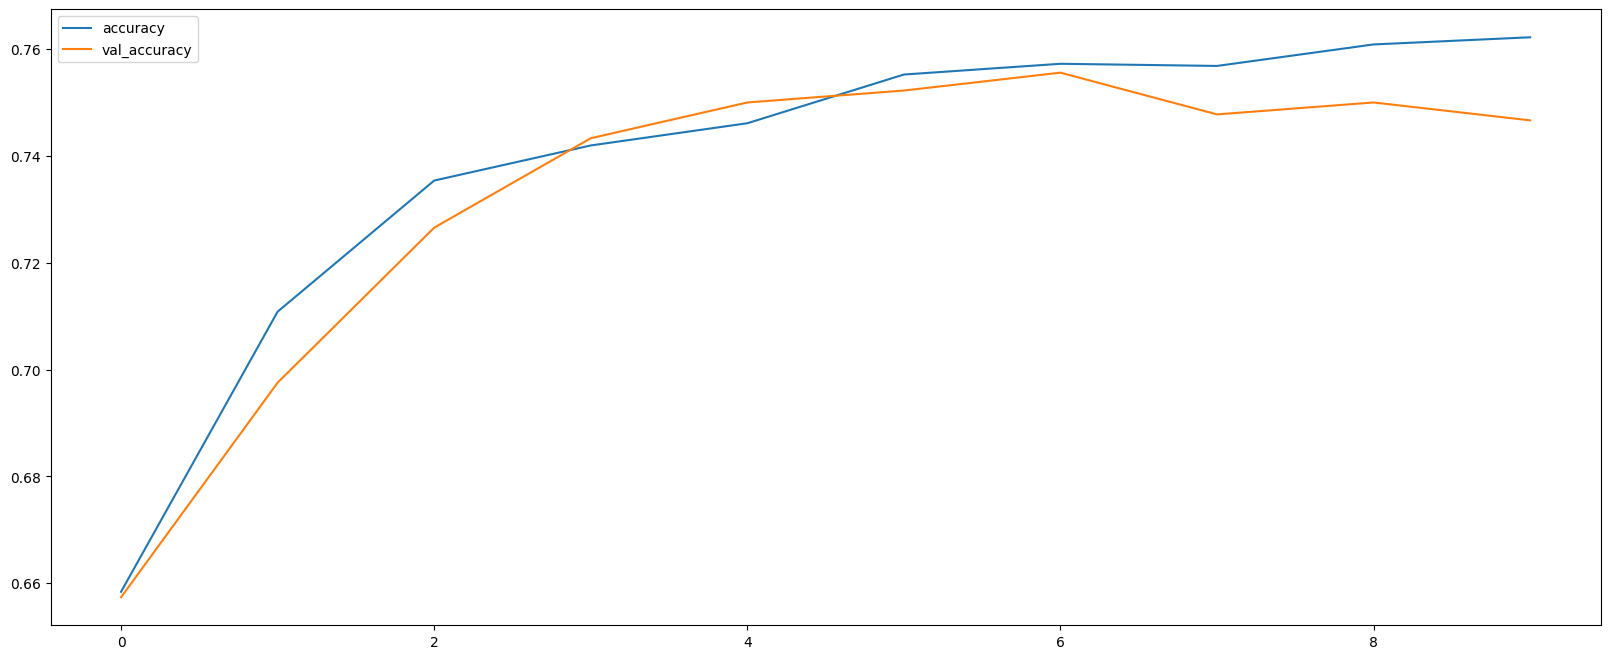

In [47]:
# Plot between accuracy and val_accuracy
df_history_func[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

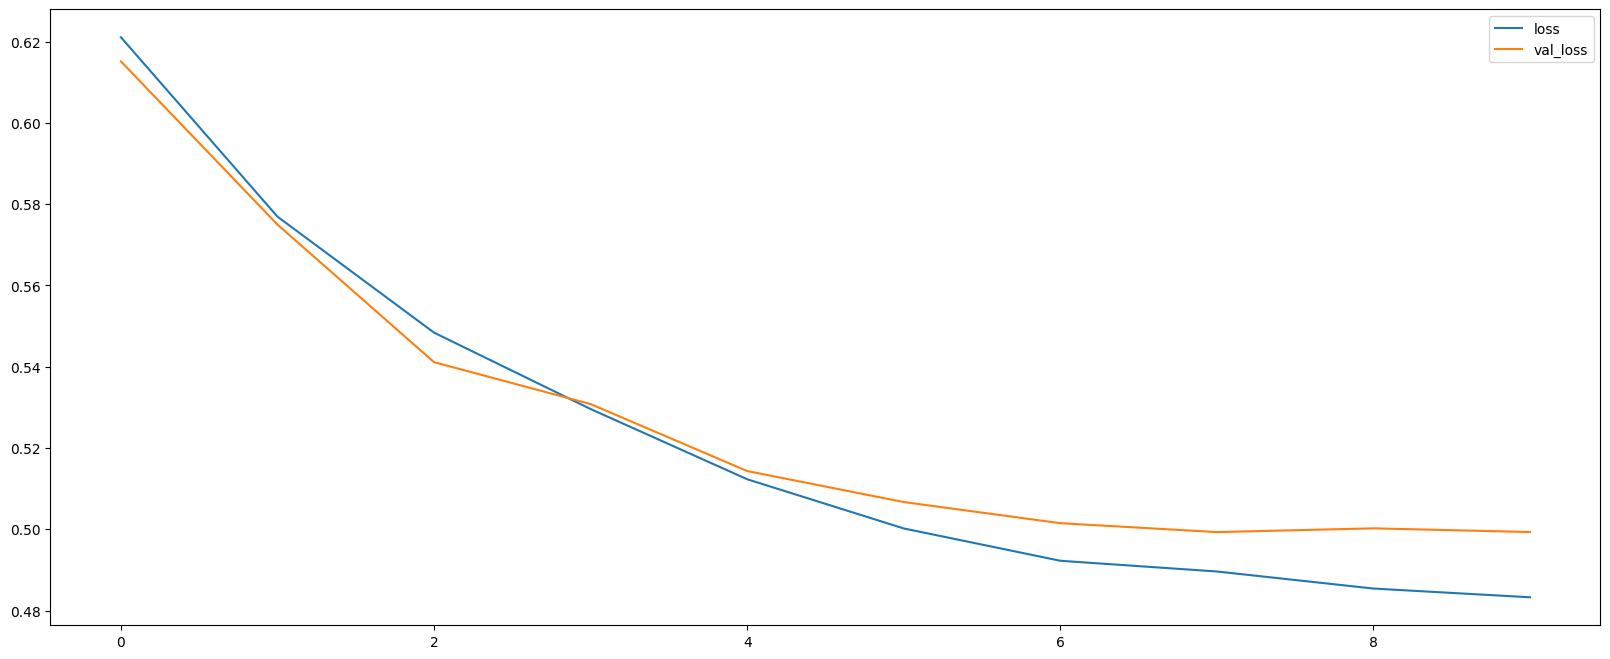

In [48]:
# Plot between loss and val_loss
df_history_func[['loss', 'val_loss']].plot()

**F1-score**

Although the functional model shows the result of accuracy and loss no better than sequential, apparently the result of f1-score is better than sequential. This means that the prediction using functional model is better accuracy and less misprediction than sequential, although the potential of error prediction will still happen.

In [49]:
# Classification Report
y_pred_train_func = model_func.predict(X_train)
y_pred_test_func = model_func.predict(X_test)
y_pred_val_func = model_func.predict(X_val)

y_pred_train_func = np.where(y_pred_train_func >=0.5, 1, 0)
y_pred_test_func = np.where(y_pred_test_func >=0.5, 1, 0)
y_pred_val_func = np.where(y_pred_val_func >=0.5, 1, 0)
print('\n')

print('Train set Classification Report')
print(classification_report(y_train, y_pred_train_func))

# Model Evaluation
print('F1-Score')
print('Train Set  : ', f1_score(y_train, y_pred_train_func))
print('Test Set  : ', f1_score(y_test, y_pred_test_func))
print('Validation Set  : ', f1_score(y_val, y_pred_val_func))

28/28 [==============================] - 0s 3ms/step


Train set Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      3728
         1.0       0.74      0.81      0.78      3728

    accuracy                           0.77      7456
   macro avg       0.77      0.77      0.77      7456
weighted avg       0.77      0.77      0.77      7456

F1-Score
Train Set  :  0.7763107293936674
Test Set  :  0.6354166666666667
Validation Set  :  0.6119658119658119


## **9. Model Saving**

This part is for saving and loading the pipeline and model that will be applied to predict data inference and deployment.

The chosen model to be used to predicting data inference and deployment should be considered based on **how the model works** and **its precision, recall, and f1-score**. Since both sequential and functional shows almost no exploding gradient and no vanishing gradient at all, thus both model can be considered as working. In this casae, f1-score will be the threshold of the chosen model because we need to predict `Churn` rate more precisely.

The chosen model : **Functional Neural Network model**

**Saving model**

In [50]:
# Save Pipeline
with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [51]:
# Summary of Model Sequential
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 37)          148         ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_1 (Dropout)            (None, 37)           0           ['batch_normalization_1[0][0]']  
                                                                                                  
 dense_9 (Dense)                (None, 32)           1216        ['dropout_1[0][0]']          

In [52]:
# Freeze Model
model_func.trainable = False
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 37)          148         ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_1 (Dropout)            (None, 37)           0           ['batch_normalization_1[0][0]']  
                                                                                                  
 dense_9 (Dense)                (None, 32)           1216        ['dropout_1[0][0]']          

In [53]:
# Save ANN Model
model_func.save('churn_model.h5')

**Loading Model**

In [54]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('churn_model.h5')

## **10. Model Inference**

In [55]:
df_inf

,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,No
1,0,18.0,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),25.55,467.85,No
2,0,1.0,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
3,0,71.0,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.90,Yes
4,0,16.0,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,53.90,834.15,Yes
5,0,31.0,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.05,1882.80,No
6,0,14.0,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.75,712.75,Yes
7,0,72.0,No,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),38.50,2763.00,No
8,1,69.0,No,DSL,Yes,Yes,No,No,Yes,Yes,Two year,No,Credit card (automatic),56.55,3952.65,No
9,0,53.0,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,110.50,5835.50,No


In [56]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

SeniorCitizen : [0 1]

PhoneService : ['No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']



In [57]:
# Transform Inference-Set 
df_inf_transform = model_pipeline.transform(df_inf)

# Predict using Neural Network
y_pred_inf = model_ann.predict(df_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 311ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [58]:
# Creating dataframe prediction
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction'],index=df_inf.index)

# Comparing the real target and prediction
model_inf = pd.concat([df_inf['Churn'], y_pred_inf['Prediction']], axis=1).sort_index()
model_inf['Prediction'] = model_inf['Prediction'].map({1:'Yes', 0:'No'})
model_inf

,Churn,Prediction
0,No,Yes
1,No,Yes
2,Yes,Yes
3,Yes,No
4,Yes,No
5,No,No
6,Yes,Yes
7,No,No
8,No,No
9,No,No


Based on the prediction of data inference, apparently there are 4 predictions with different results of the actual `Churn`, which is customers #0, #1, #3, and #4. This data inference prediction reflects the model's precision, recall, and f1-score which is around 60-70%.

## **11. Conclusion**

Main problem: *Is the business actually growing or not based on its churn rate?*

Based on the prediction and data inference, they show that churn rate is predicted:
1. Only `30%` that customers will leave or unsubscribe the telecommunication service, and
2. `70%` customers will stay as they actually need internet services, instead of other services such as phone services or TV/Movies streaming.

### **Business Insights**

As the EDA shows that most `Churn` customers are because of their needs, the focus of the business is suggested about **Internet services**.
- **To increase the facility and infrastructors of internet services** since most of customers are non-senior, and internet users tend not to unsubscribe the telco service.
- **To evaluate customers satisfaction** to strengthen the prediction. This is important because the chance of churn in the future will be mostly from internet users and non-senior citizens (as the major subsribers).
-  However, **if the telco still does not want the other businesses to be collapsed**, such as Phone Serives and Streaming Services, then the further analysis for particular business should be done first.
- **To set the right market targets**, for example, Senior Citizens do not use internet service frequently and they tend to use phone service. Then phone service and price should be based on Senior Citizens income and expense as well.

### **Model Insights**
The classification report in the sequential model, the f1-score is not good enough, which means the prediction is still 50-50 right and wrong. This model is better not be used. Hence, it will create many misprediction to class either the `Churn` customers or not. The recall for class-1 is also very low, which is underfitting, and it means that the prediction mispredicts that more customers will be included as churn while the actual observation shows the opposite.
- **Activation Functions**: the activation function defines if given node should be “activated” or not based on the weighted sum.
- **Backpropagation**: to determining how changing the weights impact the overall cost in the neural network. What it does is propagating the “error” backwards in the neural network. On the way back it is finding how much each weight is contributing in the overall “error”. This can be indicated by `epochs`.
- What to avoid: **exploding gradient**, where the model is not stable enough to train the data so the results for each, and **vanishing gradient** that means the train model is overfit rather than using test or validation set.

In [59]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.3.
